**Brian Blaylock**  
*July 27, 2021*

# National Blend of Models (NMB)

cgfrib interprets the NMB strangely. Not sure what is going on here. I posted an issue on GitHub: https://github.com/ecmwf/cfgrib/issues/240

In [1]:
from herbie.archive import Herbie
from toolbox.cartopy_tools import common_features, pc
from paint.standard2 import cm_tmp, cm_wind

import matplotlib.pyplot as plt
import cartopy.crs as ccrs


🥳 Herbie loaded your custom templates.


In [2]:
H = Herbie("2022-05-01 12:00", model="nbm", fxx=1, product="co")


🏋🏻‍♂️ Found 2022-May-01 12:00 UTC F01 [NBM] [product=co] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [3]:
H.grib


'https://noaa-nbm-grib2-pds.s3.amazonaws.com/blend.20220501/12/core/blend.t12z.core.f001.co.grib2'

In [4]:
H.SOURCES


{'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/blend/prod/blend.20220501/12/core/blend.t12z.core.f001.co.grib2',
 'aws': 'https://noaa-nbm-grib2-pds.s3.amazonaws.com/blend.20220501/12/core/blend.t12z.core.f001.co.grib2'}

In [5]:
H.read_idx(":TMP:2 m above ground:.*fcst$")


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,??,search_this
53,54,67526627,68863209,67526627-68863209,2022-05-01 12:00:00,2022-05-01 13:00:00,TMP,2 m above ground,1 hour fcst,,,:TMP:2 m above ground:1 hour fcst


In [6]:
ds = H.xarray(":TMP:2 m above ground:.*fcst$")
ds


<xarray.Dataset>
Dimensions:              (y: 1597, x: 2345)
Coordinates:
    time                 datetime64[ns] 2022-05-01T12:00:00
    step                 timedelta64[ns] 01:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 19.23 19.23 19.24 ... 54.38 54.38 54.37
    longitude            (y, x) float64 233.7 233.7 233.8 ... 300.9 300.9 301.0
    valid_time           datetime64[ns] 2022-05-01T13:00:00
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 292.7 292.7 292.7 ... 268.7 268.7 268.7
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          14
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   nbm
    product:                 co
    description:             National Blend of Models
    remote_grib:             https://noaa-nbm-grib2-pds.s3.amazonaws.com/blen...
    local_grib:              /p/cwfs/blaylock/data/nbm/20220501/subset_c5b76d...
    searchString:            :TMP:2 m above ground:.*fcst$

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


Text(0.0, 1.0, 'NBM: CONUS 13-km resolution')

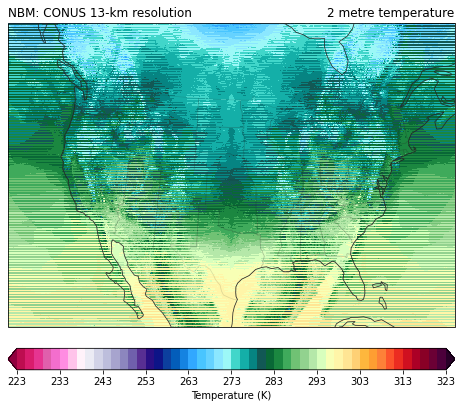

In [7]:
xvar = ds.t2m

ax = common_features(crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, xvar, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(xvar.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")


In [8]:
x = H.xarray("WIND:10 m.*$", verbose=True)


📇 Download subset: [NBM] model [co] product run at 2022-May-01 12:00 UTC F01                                                            
 cURL from https://noaa-nbm-grib2-pds.s3.amazonaws.com/blend.20220501/12/core/blend.t12z.core.f001.co.grib2
  69  :WIND:10 m above ground:1 hour fcst
  72  :WIND:10 m above ground:1 hour fcst:ens std dev
💾 Saved the above subset to /p/cwfs/blaylock/data/nbm/20220501/subset_fd0b54cc9ac3ff58ac289b71582e09aea111611d__blend.t12z.core.f001.co.grib2


/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


Text(0.0, 1.0, 'NBM: CONUS 13-km resolution')

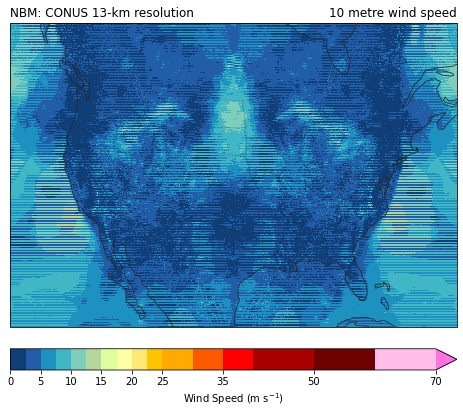

In [9]:
xvar = x.si10

ax = common_features(crs=x.herbie.crs, figsize=[8, 8]).STATES().ax
p = ax.pcolormesh(x.longitude, x.latitude, xvar, transform=pc, **cm_wind().cmap_kwargs)
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05, **cm_wind().cbar_kwargs)

ax.set_title(xvar.GRIB_name, loc="right")
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc="left")


In [10]:
H.read_idx("^:TMP:2 m .*1 hour fcst$")


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,??,search_this
53,54,67526627,68863209,67526627-68863209,2022-05-01 12:00:00,2022-05-01 13:00:00,TMP,2 m above ground,1 hour fcst,,,:TMP:2 m above ground:1 hour fcst
